PROPORTIONALER FIT VON MESSDATEN
==========================================
In diesem notebook kann aus Messwerten, gespeichert als .txt, eine Modellfunktion (hier: Proportionalität) anhand der Methode der kleinsten Quadrate gewonnen werden. Der Code ist praktisch identisch mit dem Skript propfit.py.

Als erstes muss sichergestellt werden, dass die Messdaten in einem .txt file im working directory abgespeichert sind. D.h. in dem Verzeichnis, in dem dieses notebook abgespeichert liegt.

Nun werden die erforderlichen libraries und Funktionen importiert:

In [1]:
#!/bin/python
# Geschrieben 2/2021, Henry Korhonen henryk@ethz.ch, basierend auf Matlabskripten von Martin Willeke. Hinweise, Bemerkungen und Vorschläge bitte an henryk@ethz.ch.


# Vorbemerkung zum Fit einer Proportionalität: Die kürzeste Variante wäre hier nicht die Standardvorgehensweise (wie unten) sondern:  y = a * x  <=>  y/x = a , d.h. 
# man benötigt nur die Mittelwerte von y und x

# importieren von libraries bzw. Funktionen.
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from math import sqrt
import matplotlib.pyplot as plt

Als nächstes werden die Messdaten eingelesen. In der ersten Zeile muss sichergestellt werden, dass der Dateiname im Argument von read_table() exakt mit dem des Messwert-files übereinstimmt. Hier im Beispiel ist dies test_lin.txt. Die Messdaten müssen mit Leerschlägen getrennt werden. Alternativ kann man man den Parameter sep anpassen.

In [2]:
xy = pd.read_table('test_lin.txt', names=['x','y'], sep=r'\s+') # Lesen der Daten, erstellen eines Dataframes. Als Separator kommt hier eine unbestimmte Anzahl Leerschläge in Frage. Andernfalls "sep" anpassen.

y = xy['y'] # Relevante Daten aus dem Dataframe extrahieren. Achtung: "names" in pd.read_table gibt der ersten Spalte den Namen x und der zweiten y. Unbedingt sicherstellen, dass die richtigen Daten extrahiert werden!
x = xy['x']

N = len(y) # Anzahl Datenpunkte ermitteln.

Optional: Mit dem nächsten Stück code kann überprüft werden, ob die Daten richtig eingelesen wurden:

In [3]:
print('x: {0}\ny: {1}'.format(x, y))

x: 0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
Name: x, dtype: float64
y: 0     18.4
1     28.9
2     35.5
3     55.1
4     59.0
5     72.1
6     78.0
7     87.0
8     99.0
9    111.0
Name: y, dtype: float64


Nun will eine Funktion definiert werden. Hier wird eine Proportionalität gefittet.

In [4]:
def func(x, a): # Funktion definieren, die gefittet werden soll. Hier wird mit einer Polynomfunktion ersten Grades gearbeitet. Bei mehr Variablen muss das Argument (das in Klammern) sinngemäß ergänzt werden.

    return a*x

Im nächsten Schritt passiert die Ausgleichsrechnung. popt wird den Regressionskoeffizienten a enthalten, pcov enthält die Varianz des Regressionskoeffizienten und deren Quadratwurzel ist die dazugehörige Standardabweichung.

Optional: Die Auskommentierte Zeile tut das gleiche wie die erste, jedoch kann man dort einen Bereich angeben, in dem man den Koeffizienten vermutet. (a würde zwischen alower und aupper vermutet werden)

In [5]:
popt, pcov = curve_fit(func, x, y) # fitten der Daten
# popt, pcov = curve_fit(func, x, y, bounds=([alower], [aupper])) # fitten der Daten mit Eingrenzung des Regressionskoeffizienten
pstd = np.sqrt(np.diag(pcov)) # Standardabweichung des Regressionskoeffizienten. Nota bene: in pcov steht die Varianz der Regressionskoeffizienten.

Das m%-Vertrauensintervall lässt sich gemütlich in vier Zeilen berechnen. m muss in diesem Fall hardcoded sein, also durch alpha definiert werden: m = 100*(1-alpha). p wird ermittelt, um sogleich automatisch die Anzahl Freiheitsgrade korrekt zu berechnen (dof), mit welchen der korrekte Student-T-Faktor ermittelt werden kann (t.ppf()).

In [6]:
# Vertrauensintervall berechnen
alpha = 0.05 # m%-Vertrauensintervall: m = 100*(1-alpha)
p = len(popt)
dof = max(0,N-p) # Anzahl Freiheitsgrade (nota bene: das hängt von der Anzahl Regressionskoeffizienten in der Fitfunktion ab (siehe def func(...) oben)
tinv = stats.t.ppf(1.0-alpha/2., dof) # Student-T-Faktor ermitteln

Nun ist alles berechnet und die Ausgabe der Daten kann beginnen. Die ersten vier Zeilen listen sämtliche Regressionskoeffizienten mit ihrem jeweiligen m%-Vertrauensintervall und der jeweiligen Standardabweichung sowie die Anzahl Messungen und Freiheitsgrade auf.

Danach werden die Daten und die gefittete lineare Funktion zusammen geplottet. Dieser Plot wird noch nicht gezeigt, dies passiert erst ganz unten. Ebenfalls wird eine PNG-Datei sowie eine PDF-Datei davon erstellt. Für den Bericht ist die PDF-Datei am interessantesten, da sie Vektor- und keine Rastergrafik enthält. Der Dateiname sollte jeweils noch direkt im Skript unten im Argument von plt.savefig angepasst werden.

Et voilà.

Anzahl Freiheitsgrade: 9
Anzahl Messungen: 10
Parameter a: 11.360259741211744 
 Vertrauensintervall: [10.767299887698414  11.953219594725073]
 Standardabweichung: 0.26212142254292264


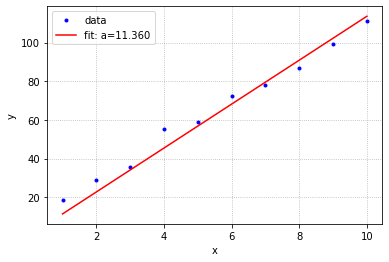

In [7]:
print('Anzahl Freiheitsgrade: {0}\nAnzahl Messungen: {1}\n=================================='.format(dof, N))
for i, regkoeff,var in zip(range(N), popt, np.diag(pcov)): # Hier werden alle Regressionskoeffizienten mit den entsprechenden Vertrauensintervallen ausgegeben.
    sigma = var**0.5
    print('Parameter {0}: {1} \n Vertrauensintervall: [{2}  {3}]\n Standardabweichung: {4}\n=================================='.format("a", regkoeff, regkoeff - sigma*tinv, regkoeff + sigma*tinv, sigma))



plt.plot(x,y,'b.',label='data') # Daten plotten
plt.plot(x, func(x, popt), 'r-', label='fit: a=%5.3f' % tuple(popt)) # Gefittete Funktion plotten. 

plt.grid(linestyle=':') # grid zeichnen
plt.xlabel('x') # labels setzen
plt.ylabel('y')
plt.legend() # Legende generieren

plt.savefig("dateiname.pdf") # Plot als PDF-Datei speichern.
plt.savefig("dateiname.png") # Plot als PNG-Datei speichern.

plt.show() # Plot anzeigen